- 実験は7つ
  - TS_5_4,
  - TS_6_4,
  - TS_6_6,
  - TS_69_2,
  - TS_73_6,
  - TS_86_3,
  - TS_99_9,

- それぞれに4つのファイル
  - ctfdeconvolved.zarr
  - denoised.zarr
  - isonetcorrected.zarr
  - wbp.zarr


In [1]:
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zarr

In [ ]:
# Load the first zarr.
z_ts_6_4 = zarr.open('../input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr', mode='r')
z_ts_6_4_iso = zarr.open('../input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/isonetcorrected.zarr', mode='r')
z_ts_6_4_dcon = zarr.open('../input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/ctfdeconvolved.zarr', mode='r')
z_ts_6_4_wbp = zarr.open('../input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/wbp.zarr', mode='r')

In [10]:
print(z_ts_6_4)
print(z_ts_6_4[0].shape)
print(z_ts_6_4[1].shape)
print(z_ts_6_4[2].shape)

<zarr.hierarchy.Group '/' read-only>
(184, 630, 630)
(92, 315, 315)
(46, 158, 158)


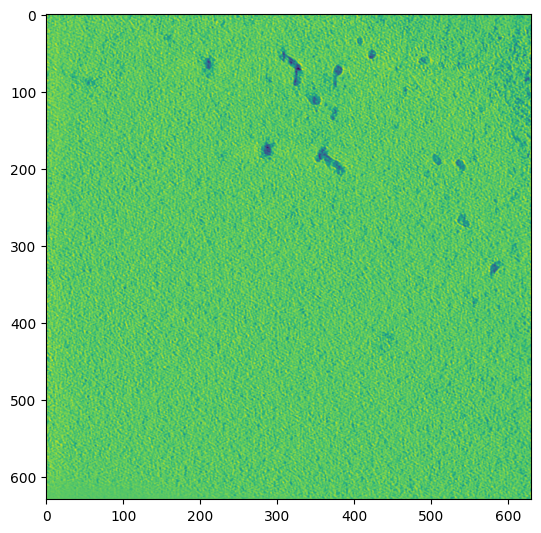

In [22]:
fig = plt.figure(figsize=(6.3,6.3))
_ = plt.imshow(z_ts_6_4[0][0])

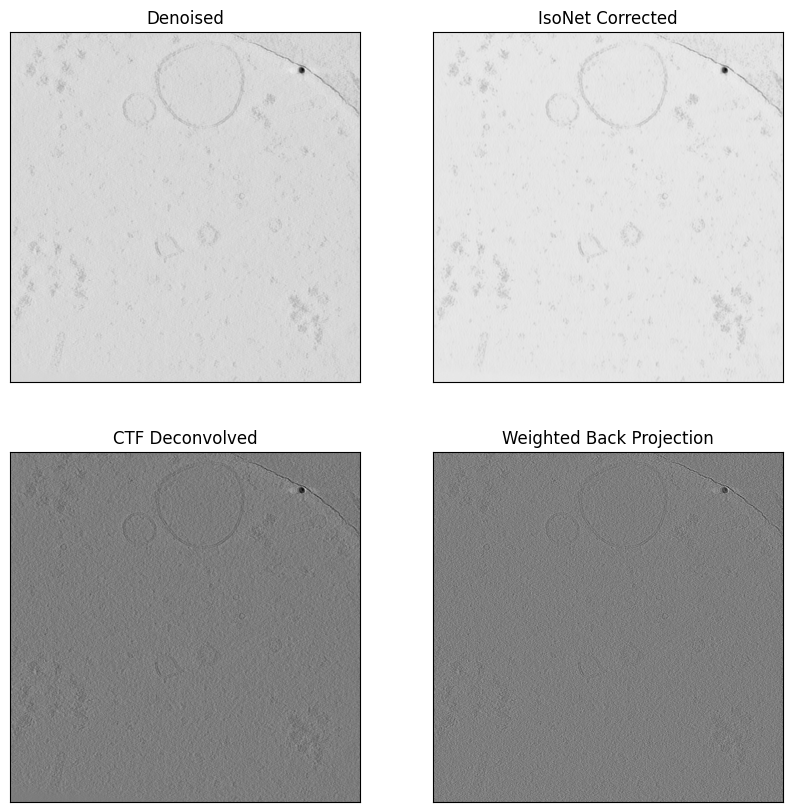

In [16]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(2, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title('Denoised')
plt.imshow(z_ts_6_4[0][62], cmap='gray')
ax = plt.subplot(2, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title('IsoNet Corrected')
plt.imshow(z_ts_6_4_iso[0][62], cmap='gray')
ax = plt.subplot(2, 2, 3)
plt.xticks([])
plt.yticks([])
plt.title('CTF Deconvolved')
plt.imshow(z_ts_6_4_dcon[0][62], cmap='gray')
ax = plt.subplot(2, 2, 4)
plt.xticks([])
plt.yticks([])
plt.title('Weighted Back Projection')
_ = plt.imshow(z_ts_6_4_wbp[0][62], cmap='gray')

In [36]:
ribosomes_x = []
ribosomes_y = []
f = open('../input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_6_4/Picks/ribosome.json')
for p in json.loads(f.read())['points']:
    z = float(p['location']['z'])
    if z >= 600 and z < 650:
        ribosomes_x.append(float(p['location']['x'])/10)
        ribosomes_y.append(float(p['location']['y'])/10)
        print(p['location'])


{'x': 5274.903, 'y': 5288.121, 'z': 619.798}
{'x': 5312.439, 'y': 4964.156, 'z': 602.574}
{'x': 5130.837, 'y': 5121.036, 'z': 631.702}
{'x': 5106.838, 'y': 4835.263, 'z': 619.225}
{'x': 1273.648, 'y': 4386.703, 'z': 631.656}
{'x': 440.984, 'y': 3866.177, 'z': 643.857}
{'x': 1015.725, 'y': 640.198, 'z': 622.387}


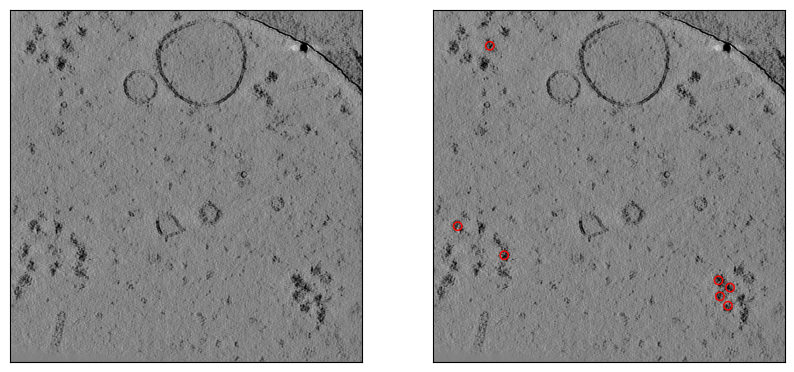

In [37]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(z_ts_6_4[0][62], cmap='gray', vmin=-0.00005, vmax=0.00005)
ax = plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(z_ts_6_4[0][62], cmap='gray', vmin=-0.00005, vmax=0.00005)
_ = plt.scatter(ribosomes_x, ribosomes_y, edgecolor='red', facecolor='none')

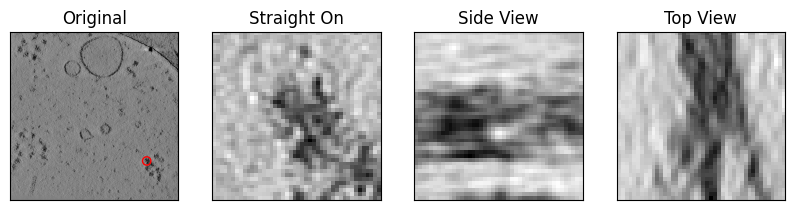

In [38]:
fig = plt.figure(figsize=(10,2.5))
ax = plt.subplot(1, 4, 1)
plt.xticks([])
plt.yticks([])
plt.title('Original')
plt.imshow(z_ts_6_4[0][61], cmap='gray', vmin=-0.00005, vmax=0.00005)
_ = plt.scatter([5106.838/10], [4835.263/10], edgecolor='red', facecolor='none')
ax = plt.subplot(1, 4, 2)
plt.xticks([])
plt.yticks([])
plt.title('Straight On')
plt.imshow(z_ts_6_4[0][61, 461:505, 488:532], cmap='gray')
ax = plt.subplot(1, 4, 3)
plt.xticks([])
plt.yticks([])
plt.title('Side View')
plt.imshow(np.transpose(z_ts_6_4[0], axes=(2,1,0))[510, 461:505, 39:83], cmap='gray')
ax = plt.subplot(1, 4, 4)
plt.xticks([])
plt.yticks([])
plt.title('Top View')
_ = plt.imshow(np.transpose(z_ts_6_4[0], axes=(1,0,2))[483, 39:83, 488:532], cmap='gray')

In [44]:
exp = "TS_6_4"
z_ts_6_4 = zarr.open(f'../input/czii-cryo-et-object-identification/test/static/ExperimentRuns/{exp}/VoxelSpacing10.000/denoised.zarr', mode='r')
print(z_ts_6_4)
print(z_ts_6_4[0].shape)
print(z_ts_6_4[1].shape)
print(z_ts_6_4[2].shape)

<zarr.hierarchy.Group '/' read-only>
(184, 630, 630)
(92, 315, 315)
(46, 158, 158)


In [62]:
explist = [
    "TS_5_4",
    "TS_6_4",
    "TS_6_6",
    "TS_69_2",
    "TS_73_6",
    "TS_86_3",
    "TS_99_9"
]
traget =[
    "ribosome",
    "apo-ferritin",
    "virus-like-particle",
    "beta-galactosidase",
    "thyroglobulin",
    "beta-amylase",
]
for exp in explist:
    z = zarr.open(f'../input/czii-cryo-et-object-identification/train/static/ExperimentRuns/{exp}/VoxelSpacing10.000/denoised.zarr', mode='r')
    print(exp, z[0].shape)

TS_5_4 (184, 630, 630)
TS_6_4 (184, 630, 630)
TS_6_6 (184, 630, 630)
TS_69_2 (184, 630, 630)
TS_73_6 (184, 630, 630)
TS_86_3 (184, 630, 630)
TS_99_9 (184, 630, 630)


In [63]:
for t in traget:
    f = open(f'../input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_6_4/Picks/{t}.json')
    picks = json.loads(f.read())['points']
    print(t, len(picks))

ribosome 74
apo-ferritin 58
virus-like-particle 10
beta-galactosidase 12
thyroglobulin 30
beta-amylase 9


In [ ]:
count = 0
for exp in explist:
    for t in traget:
        f = open(f'../input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/{exp}/Picks/{t}.json')
        picks = json.loads(f.read())['points']
        print(exp, t, len(picks))
        count += len(picks)
print(count)

TS_5_4 ribosome 31
TS_5_4 apo-ferritin 46
TS_5_4 virus-like-particle 11
TS_5_4 beta-galactosidase 12
TS_5_4 thyroglobulin 30
TS_5_4 beta-amylase 10
TS_6_4 ribosome 74
TS_6_4 apo-ferritin 58
TS_6_4 virus-like-particle 10
TS_6_4 beta-galactosidase 12
TS_6_4 thyroglobulin 30
TS_6_4 beta-amylase 9
TS_6_6 ribosome 23
TS_6_6 apo-ferritin 41
TS_6_6 virus-like-particle 19
TS_6_6 beta-galactosidase 11
TS_6_6 thyroglobulin 35
TS_6_6 beta-amylase 14
TS_69_2 ribosome 37
TS_69_2 apo-ferritin 35
TS_69_2 virus-like-particle 9
TS_69_2 beta-galactosidase 16
TS_69_2 thyroglobulin 34
TS_69_2 beta-amylase 12
TS_73_6 ribosome 46
TS_73_6 apo-ferritin 95
TS_73_6 virus-like-particle 22
TS_73_6 beta-galactosidase 14
TS_73_6 thyroglobulin 28
TS_73_6 beta-amylase 12
TS_86_3 ribosome 55
TS_86_3 apo-ferritin 64
TS_86_3 virus-like-particle 29
TS_86_3 beta-galactosidase 23
TS_86_3 thyroglobulin 45
TS_86_3 beta-amylase 9
TS_99_9 ribosome 65
TS_99_9 apo-ferritin 36
TS_99_9 virus-like-particle 13
TS_99_9 beta-galactosi

In [71]:
#実験ごとのターゲットの数を表にする
list = np.array([])
for exp in explist:
    for t in traget:
        f = open(f'../input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/{exp}/Picks/{t}.json')
        picks = json.loads(f.read())['points']
        print(exp, t, len(picks))
        list = np.append(list, len(picks))
list = list.reshape(7, 6)
print(list)


TS_5_4 ribosome 31
TS_5_4 apo-ferritin 46
TS_5_4 virus-like-particle 11
TS_5_4 beta-galactosidase 12
TS_5_4 thyroglobulin 30
TS_5_4 beta-amylase 10
TS_6_4 ribosome 74
TS_6_4 apo-ferritin 58
TS_6_4 virus-like-particle 10
TS_6_4 beta-galactosidase 12
TS_6_4 thyroglobulin 30
TS_6_4 beta-amylase 9
TS_6_6 ribosome 23
TS_6_6 apo-ferritin 41
TS_6_6 virus-like-particle 19
TS_6_6 beta-galactosidase 11
TS_6_6 thyroglobulin 35
TS_6_6 beta-amylase 14
TS_69_2 ribosome 37
TS_69_2 apo-ferritin 35
TS_69_2 virus-like-particle 9
TS_69_2 beta-galactosidase 16
TS_69_2 thyroglobulin 34
TS_69_2 beta-amylase 12
TS_73_6 ribosome 46
TS_73_6 apo-ferritin 95
TS_73_6 virus-like-particle 22
TS_73_6 beta-galactosidase 14
TS_73_6 thyroglobulin 28
TS_73_6 beta-amylase 12
TS_86_3 ribosome 55
TS_86_3 apo-ferritin 64
TS_86_3 virus-like-particle 29
TS_86_3 beta-galactosidase 23
TS_86_3 thyroglobulin 45
TS_86_3 beta-amylase 9
TS_99_9 ribosome 65
TS_99_9 apo-ferritin 36
TS_99_9 virus-like-particle 13
TS_99_9 beta-galactosi

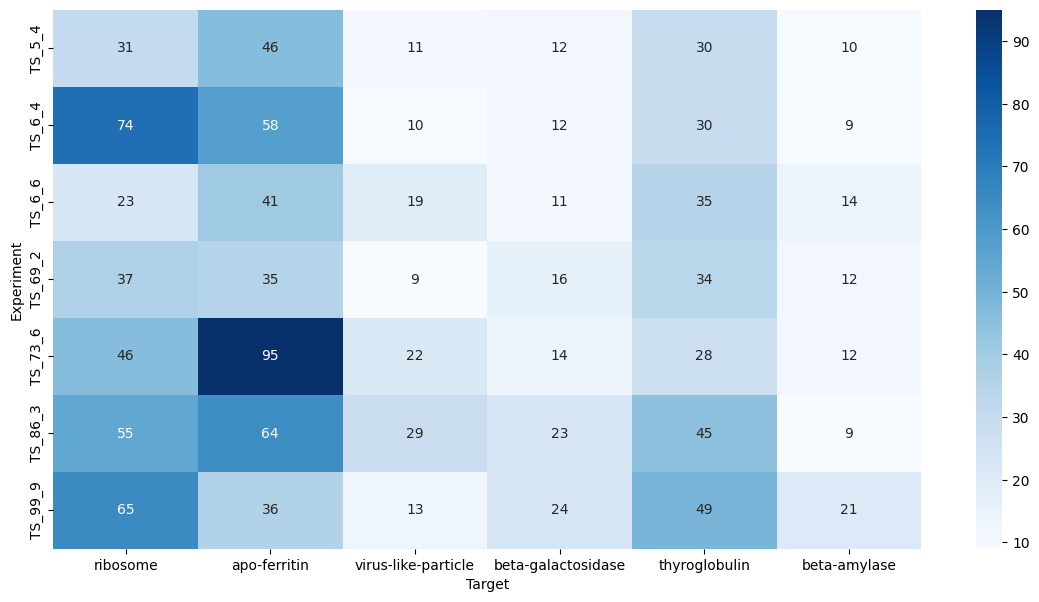

In [74]:
#listをヒートマップにする
#実験名とターゲット名を軸にする

fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(list, annot=True, fmt="1.0f", cmap="Blues")
plt.xlabel("Target")
plt.ylabel("Experiment")
plt.xticks(np.arange(6) + 0.5, traget)
plt.yticks(np.arange(7) + 0.5, explist)

plt.show()
